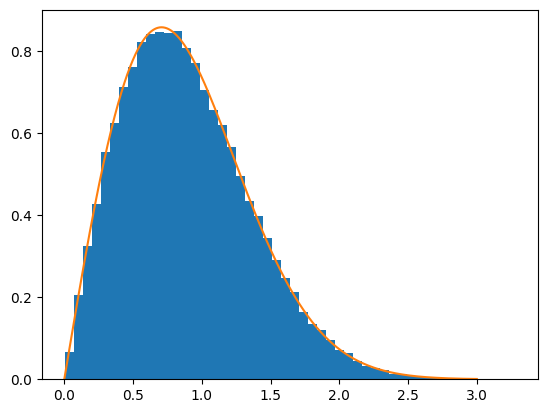

In [29]:
def generate_X():
    u = rand.random()
    x = u ** 0.5
    return x

import numpy as np
from scipy import stats
def generate_X(n = 1):
    u = stats.uniform.rvs(size = n)
    x = np.sqrt( - np.log( 1-u ) ) # mathematical operations on a numpy array are elementwise
    return x

import matplotlib.pyplot as plt
import numpy as np
import math

# Generate 100000 random variates
samples = generate_X(n = 100000)
# Plots a histogram of samples.
# The density=True argument normalizes bin heights so that
# the integral of the histogram is 1.
plt.hist(samples, bins=50, density=True)
# Plots the function f(x) = 2x on the interval [0,1]
xs = np.linspace(0, 3, 100000) # generate 1000 evenly-spaced points over [0,1]
ys = 2 * xs * np.exp( np.array(- xs **2) ) # compute 2 * x for all x in xs
plt.plot(xs, ys)


Accepted 10000 points out of 20066
Empirical efficiency: 0.49835542709060104


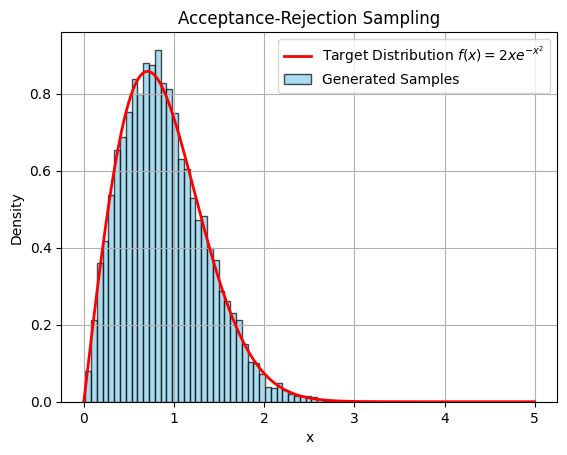

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: f(x) = 2xe^(-x^2)
def f(x):
    return 2 * x * math.exp(-x ** 2)

# Proposal distribution: g(x) = e^(-x)
def g(x):
    return math.exp(-x)

def accept_reject():
    global num_accepted, num_rejected
    while True:
        x = random.expovariate(1)  # Generate sample from Exponential(1) proposal distribution
        y = random.uniform(0, 2*g(x))  # Generate a uniform sample for comparison, since C=2
        if y <= f(x):
            num_accepted += 1
            return x  # Accept the sample
        else:
            num_rejected += 1
        # Otherwise, reject and continue

num_accepted = 0
num_rejected = 0

# Generate samples using the acceptance-rejection method
samples = [accept_reject() for _ in range(10000)]

# Calculate acceptance-rejection statistics
print(f"Accepted {num_accepted} points out of {num_accepted + num_rejected}")
print(f"Empirical efficiency: {num_accepted / (num_accepted + num_rejected)}")

# Plot histogram of generated samples
plt.hist(samples, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Plot the target distribution f(x) for comparison
x_values = np.linspace(0, 5, 1000)
plt.plot(x_values, [f(x) for x in x_values], 'r-', linewidth=2)

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Acceptance-Rejection Sampling')
plt.legend(['Target Distribution $f(x) = 2xe^{-x^2}$', 'Generated Samples'])
plt.grid(True)
plt.show()


In [4]:
import random
import numpy as np

def snakes_and_ladders():
    # Define snakes and ladders
    snakes_ladders = {3: 11, 13: 4, 17: 10, 15: 19}

    position = 0
    toss_count = 0

    while position < 20:
        toss = random.randint(1, 6)
        position += toss

        # Adjust for snakes and ladders
        if position in snakes_ladders:
            position = snakes_ladders[position]

        toss_count += 1

    return toss_count

def simulate_game(runs):
    results = [snakes_and_ladders() for _ in range(runs)]
    mean = np.mean(results)
    std_dev = np.std(results, ddof=1)  # unbiased estimator of population std deviation
    margin_of_error = 1.96 * (std_dev / (runs ** 0.5))  # 95% confidence interval z-value
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)
    return mean, confidence_interval

# Run simulation
runs = 100000  # Choose any large enough number of runs
mean, confidence_interval = simulate_game(runs)

print(f"Expected number of tosses: {mean}")
print(f"95% Confidence Interval for E[X]: {confidence_interval}")


Expected number of tosses: 7.06928
95% Confidence Interval for E[X]: (7.049345283585986, 7.089214716414014)


In [2]:
import numpy as np

# Define compartments and their connections
compartments = {
    1: [2, 3],
    2: [1],
    3: [1, 4],
    4: [3, 5, 6],
    5: [4, 6],
    6: [4, 5]
}

# Define mean time spent in each compartment
mean_times = {
    1: 2,
    2: 4,
    3: 2,
    4: 2,
    5: 4,
    6: 4
}

# Function to simulate exponential time
def exponential_time(mean):
    return np.random.exponential(mean)

# Function to simulate the Markov jump process
def simulate_markov_jump_process(total_time):
    current_compartment = 1
    current_time = 0

    while current_time < total_time:
        # Simulate time spent in current compartment
        time_in_compartment = exponential_time(mean_times[current_compartment])
        current_time += time_in_compartment

        # If the time exceeds the total time, break the loop
        if current_time >= total_time:
            break

        # Choose the next compartment
        next_compartment = np.random.choice(compartments[current_compartment])

        print(f"At time {current_time:.2f}, the mouse moves from compartment {current_compartment} to compartment {next_compartment}")

        # Update current compartment
        current_compartment = next_compartment

# Simulate the Markov jump process for three hours (3 * 3600 seconds)
simulate_markov_jump_process(3 * 3600)

At time 0.55, the mouse moves from compartment 1 to compartment 3
At time 1.69, the mouse moves from compartment 3 to compartment 1
At time 1.76, the mouse moves from compartment 1 to compartment 2
At time 8.75, the mouse moves from compartment 2 to compartment 1
At time 8.98, the mouse moves from compartment 1 to compartment 2
At time 15.24, the mouse moves from compartment 2 to compartment 1
At time 18.66, the mouse moves from compartment 1 to compartment 3
At time 20.09, the mouse moves from compartment 3 to compartment 1
At time 20.23, the mouse moves from compartment 1 to compartment 3
At time 21.14, the mouse moves from compartment 3 to compartment 1
At time 22.75, the mouse moves from compartment 1 to compartment 2
At time 27.41, the mouse moves from compartment 2 to compartment 1
At time 28.79, the mouse moves from compartment 1 to compartment 2
At time 39.76, the mouse moves from compartment 2 to compartment 1
At time 41.11, the mouse moves from compartment 1 to compartment 2


In [6]:
import numpy as np

# Define compartments and their connections
compartments = {
    1: [2, 3],
    2: [1],
    3: [1, 4],
    4: [3, 5, 6],
    5: [4, 6],
    6: [4, 5]
}

# Define mean time spent in each compartment
mean_times = {
    1: 2,
    2: 4,
    3: 2,
    4: 2,
    5: 4,
    6: 4
}

# Function to simulate exponential time
def exponential_time(mean):
    return np.random.exponential(mean)

# Function to simulate the Markov jump process and output total time spent in each room
def simulate_markov_jump_process(total_time, num_simulations):
    room_times = {room: [] for room in compartments.keys()}

    for _ in range(num_simulations):
        current_compartment = 1
        current_time = 0
        room_sum = {room: 0 for room in compartments.keys()}

        while current_time < total_time:
            # Simulate time spent in current compartment
            time_in_compartment = exponential_time(mean_times[current_compartment])
            current_time += time_in_compartment

            # If the time exceeds the total time, break the loop
            if current_time >= total_time:
                break

            # Accumulate time spent in current compartment
            room_sum[current_compartment] += time_in_compartment

            # Choose the next compartment
            next_compartment = np.random.choice(compartments[current_compartment])

            # Update current compartment
            current_compartment = next_compartment

        # Store total time spent in each room for this simulation run
        for room, time_sum in room_sum.items():
            room_times[room].append(time_sum)

    # Output total time spent in each room for each simulation run
    for room, times in room_times.items():
        print(f"Total time spent in room {room} for each simulation run:", times)

# Simulate the Markov jump process and output total time spent in each room for each simulation run
simulate_markov_jump_process(3 * 3600, 1)  # Example with 1 simulation run

Total time spent in room 1 for each simulation run: [1202.5362730408106]
Total time spent in room 2 for each simulation run: [1186.0934501612767]
Total time spent in room 3 for each simulation run: [1132.9085360723852]
Total time spent in room 4 for each simulation run: [1850.7632800637275]
Total time spent in room 5 for each simulation run: [2556.589870051151]
Total time spent in room 6 for each simulation run: [2871.090803460922]


In [28]:
import numpy as np
from scipy import stats

# Define compartments and their connections
compartments = {
    1: [2, 3],
    2: [1],
    3: [1, 4],
    4: [3, 5, 6],
    5: [4, 6],
    6: [4, 5]
}

# Define mean time spent in each compartment
mean_times = {
    1: 2,
    2: 4,
    3: 2,
    4: 2,
    5: 4,
    6: 4
}

# Function to simulate exponential time
def exponential_time(mean):
    return np.random.exponential(mean)

# Function to simulate the Markov jump process and output total time spent in each room
def simulate_markov_jump_process(total_time, num_simulations):
    room_sums = {room: [] for room in compartments.keys()}

    for _ in range(num_simulations):
        current_compartment = 1
        current_time = 0
        room_sum = {room: 0 for room in compartments.keys()}

        while current_time < total_time:
            # Simulate time spent in current compartment
            time_in_compartment = exponential_time(mean_times[current_compartment])
            current_time += time_in_compartment

            # If the time exceeds the total time, break the loop
            if current_time >= total_time:
                break

            # Accumulate time spent in current compartment
            room_sum[current_compartment] += time_in_compartment

            # Choose the next compartment
            next_compartment = np.random.choice(compartments[current_compartment])

            # Update current compartment
            current_compartment = next_compartment

        # Store total time spent in each room for this simulation run
        for room, time_sum in room_sum.items():
            room_sums[room].append(time_sum)

    # Calculate sample mean and standard error for each room
    means = {room: np.mean(times) for room, times in room_sums.items()}
    std_errors = {room: np.std(times, ddof=1) / np.sqrt(num_simulations) for room, times in room_sums.items()}

    # Calculate 95% confidence intervals for each room
    confidence_intervals = {}
    for room in compartments.keys():
        z = stats.norm.ppf(0.975)  # 95% confidence interval
        margin_of_error = z * std_errors[room]
        lower_bound = round(means[room] - margin_of_error, 3)
        upper_bound = round(means[room] + margin_of_error, 3)
        relative_error = round(margin_of_error / means[room], 3) if means[room] != 0 else np.nan
        confidence_intervals[room] = (lower_bound, upper_bound, relative_error)

    return confidence_intervals

# Generate 95% confidence intervals for E[T1], E[T2], E[T3], E[T4], E[T5], E[T6]
confidence_intervals = simulate_markov_jump_process(3 * 3600, 100)

# Output confidence intervals and relative errors for each room
for room, (lower, upper, relative_error) in confidence_intervals.items():
    print(f"95% Confidence Interval for E[T{room}]: ({lower}, {upper}), Relative Error: {relative_error}")


95% Confidence Interval for E[T1]: (1256.128, 1298.43), Relative Error: 0.017
95% Confidence Interval for E[T2]: (1257.002, 1310.927), Relative Error: 0.021
95% Confidence Interval for E[T3]: (1267.675, 1292.279), Relative Error: 0.01
95% Confidence Interval for E[T4]: (1889.882, 1924.43), Relative Error: 0.009
95% Confidence Interval for E[T5]: (2498.691, 2555.701), Relative Error: 0.011
95% Confidence Interval for E[T6]: (2495.479, 2546.667), Relative Error: 0.01
